### Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of examining datasets to summarize their main characteristics, often with visual methods. It helps uncover patterns, detect anomalies, test assumptions, and build intuition before formal modeling.

#### 1. Import Libraries and Generate Synthetic Data

Starting with data import and generation, you prepare your environment. Import necessary libraries like pandas, NumPy, Matplotlib, and Seaborn. Synthetic data is generated here to simulate a real dataset including numerical and categorical features, and some missing values to mimic common data issues.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic dataset
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.randint(18, 70, 100),
    'salary': np.random.normal(50000, 15000, 100).round(0),
    'department': np.random.choice(['HR', 'Tech', 'Sales'], 100),
    'satisfaction': np.random.uniform(1, 5, 100).round(1)
})
# Introduce missing values
data.loc[np.random.choice(data.index, 10), 'salary'] = np.nan


#### 2. Data Inspection

Explore the structure and contents of your data with basic methods. `.head()` shows the first rows, `.info()` gives datatype and null info, and `.describe()` summarizes statistics of numeric data.

In [3]:
data.head()

,age,salary,department,satisfaction
0,56,21865.0,Tech,3.3
1,69,29498.0,Sales,1.4
2,46,59545.0,Sales,3.5
3,32,36399.0,Tech,5.0
4,60,57141.0,HR,1.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           100 non-null    int32  
 1   salary        91 non-null     float64
 2   department    100 non-null    object 
 3   satisfaction  100 non-null    float64
dtypes: float64(2), int32(1), object(1)
memory usage: 2.9+ KB


In [5]:
data.describe()

,age,salary,satisfaction
count,100.000000,91.000000,100.000000
mean,43.350000,51425.593407,2.927000
std,14.904663,15200.525199,1.123114
min,19.000000,20901.000000,1.100000
25%,31.750000,39870.500000,2.000000
50%,42.000000,50985.000000,3.100000
75%,57.000000,62100.500000,3.800000
max,69.000000,94155.000000,5.000000


#### 3. Handling Missing Values

Identify missing data since it can affect analysis and modeling. Here, we check count of nulls and fill missing salary values with the median as a simple imputation.

In [6]:
print("Missing values in each column:", data.isnull().sum())
median_salary = data['salary'].median()
data['salary'].fillna(median_salary, inplace=True)
print("Missing values after imputation:", data.isnull().sum())

Missing values in each column: age             0
salary          9
department      0
satisfaction    0
dtype: int64
Missing values after imputation: age             0
salary          0
department      0
satisfaction    0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_8564\3745141188.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['salary'].fillna(median_salary, inplace=True)


#### 4. Visualizing Data

Visualization aids understanding distributions and relationships. Histograms show numerical data spread; boxplots highlight group differences and outliers; scatter plots reveal correlations.

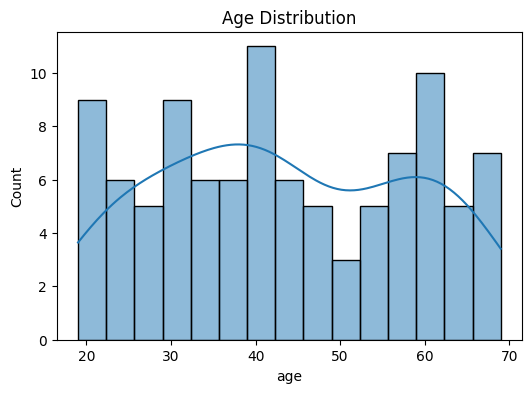

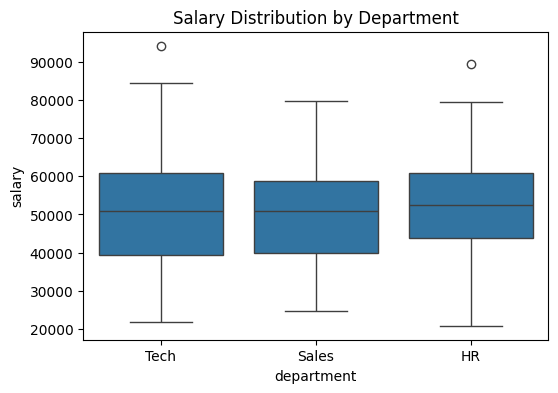

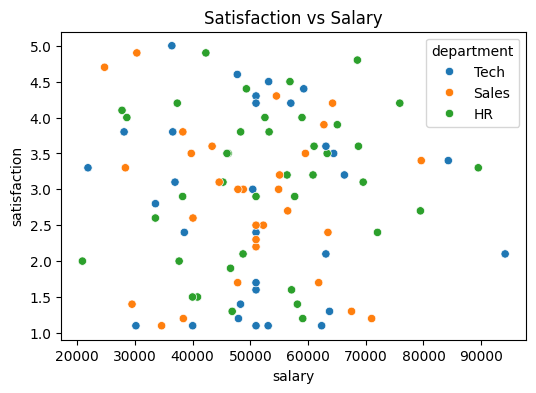

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(data['age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='department', y='salary', data=data)
plt.title('Salary Distribution by Department')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='salary', y='satisfaction', hue='department', data=data)
plt.title('Satisfaction vs Salary')
plt.show()

#### 5. Feature Exploration

Quantify relationships between numeric features using correlation coefficients to detect linear associations. Visualize these with a heatmap for an intuitive summary.

                   age    salary  satisfaction
age           1.000000 -0.119218     -0.134710
salary       -0.119218  1.000000     -0.004059
satisfaction -0.134710 -0.004059      1.000000


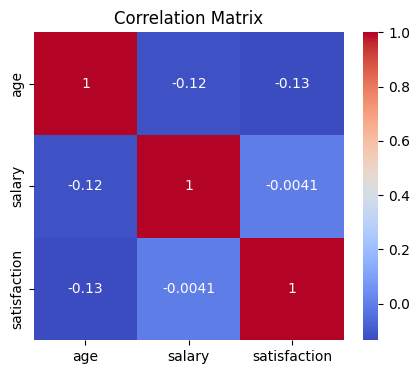

In [8]:
corr_matrix = data[['age', 'salary', 'satisfaction']].corr()
print(corr_matrix)

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

6. Detecting and Handling Outliers

Outliers can skew analysis and model performance. Visualization with boxplots helps identify outliers; statistical methods like IQR or Z-score can be applied to detect and optionally remove them.

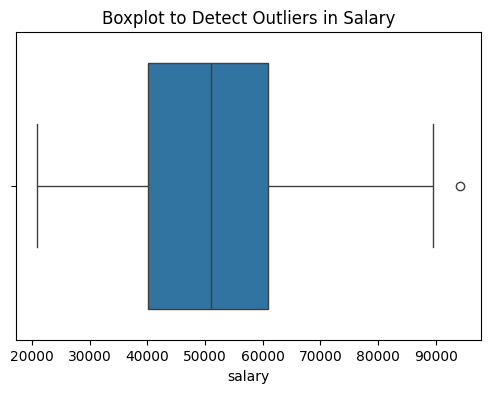

Data size before outlier removal: (100, 4)
Data size after outlier removal: (99, 4)


In [9]:
# Boxplot to check outliers in salary
plt.figure(figsize=(6,4))
sns.boxplot(x=data['salary'])
plt.title('Boxplot to Detect Outliers in Salary')
plt.show()

# Removing outliers using IQR method
Q1 = data['salary'].quantile(0.25)
Q3 = data['salary'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = data[(data['salary'] >= Q1 - 1.5 * IQR) & (data['salary'] <= Q3 + 1.5 * IQR)]
print(f"Data size before outlier removal: {data.shape}")
print(f"Data size after outlier removal: {filtered_data.shape}")

#### 7. Checking for Duplicate Rows

Duplicate records can bias results and waste resources. Identifying and removing duplicates ensures cleaner data.

In [10]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
data = data.drop_duplicates()
print(f"Data size after removing duplicates: {data.shape}")

Number of duplicate rows: 0
Data size after removing duplicates: (100, 4)


#### 8. Feature Engineering Basics

Creating or transforming features can improve model predictive power. This includes generating new features, encoding categorical variables, and feature scaling.

In [11]:
# Example: Creating a new feature - Age Group
data['age_group'] = pd.cut(data['age'], bins=[17, 30, 50, 70], labels=['Young', 'Mid-age', 'Senior'])

# Encoding categorical 'department' using one-hot encoding
department_dummies = pd.get_dummies(data['department'], prefix='dept')
data = pd.concat([data, department_dummies], axis=1)

# Scaling numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['salary_scaled', 'satisfaction_scaled']] = scaler.fit_transform(data[['salary', 'satisfaction']])

#### 9. Advanced Visualizations: Pairplot & Countplot

Pairplots visualize feature interactions in multivariate data, and countplots summarize categorical distributions.

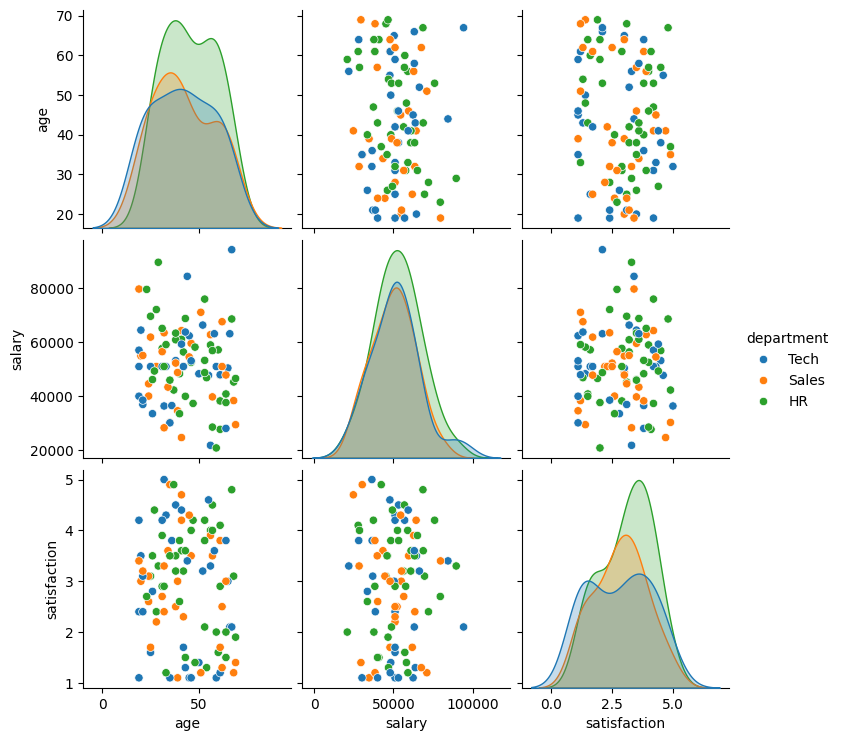

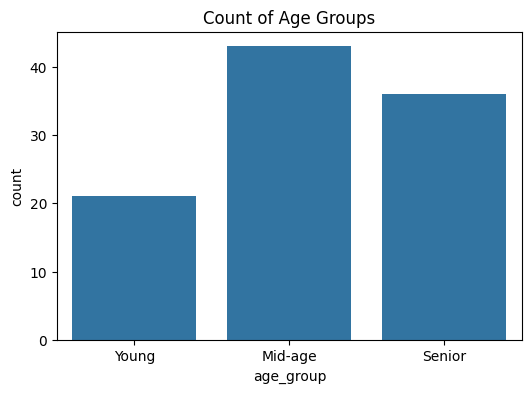

In [12]:
# Pairplot to visualize relationships and distributions
sns.pairplot(data[['age', 'salary', 'satisfaction', 'department']], hue='department')
plt.show()

# Countplot for categorical feature distribution
plt.figure(figsize=(6,4))
sns.countplot(x='age_group', data=data)
plt.title('Count of Age Groups')
plt.show()

#### 10. Checking Data Balance and Relationships

For classification tasks or categorical targets, checking class balance is important; also explore bivariate relationships for insights.

department
HR       39
Tech     31
Sales    30
Name: count, dtype: int64


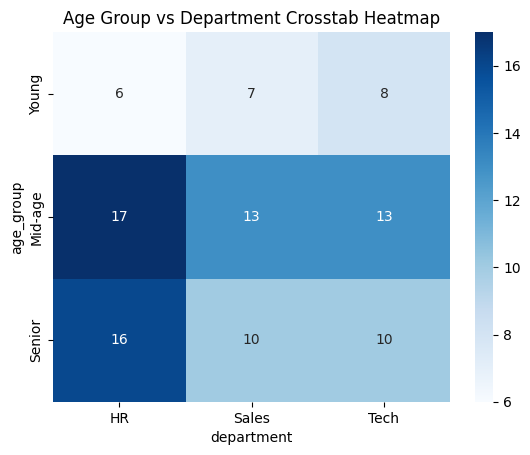

In [13]:
# Example: Value counts for target or categorical variable
print(data['department'].value_counts())

# Crosstab and heatmap for two categorical features or target relationship
crosstab = pd.crosstab(data['age_group'], data['department'])
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
plt.title('Age Group vs Department Crosstab Heatmap')
plt.show()

- #### Summary and Key Observations

* The guide makes fake data, but it leaves 9 people's salaries blank on purpose.

* A chart found one person who made way more money than everyone else . The code removed that person's row.


* The code also made a new column. It turned the 'age' number into a word like 'Young' or 'Senior'.

* One chart (the colorful square) shows that salary, age, and being happy are not linked. The numbers are all near zero .
